In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import os

In [2]:
# Define models path
model_1 = '/home/samanta/tactile_style_transfer/Pytorch-UNet/results/model_train-tools_E30_B8_LR0.00001'
model_2 = '/home/samanta/tactile_style_transfer/Pytorch-UNet/results/masking_sdf_model_train-tools_E30_B32_LR0.0001'
models = [model_1, model_2]
models_name = ['Masking', 'Masking SDF']

### Qualitative Results

Test Set on Train Tools


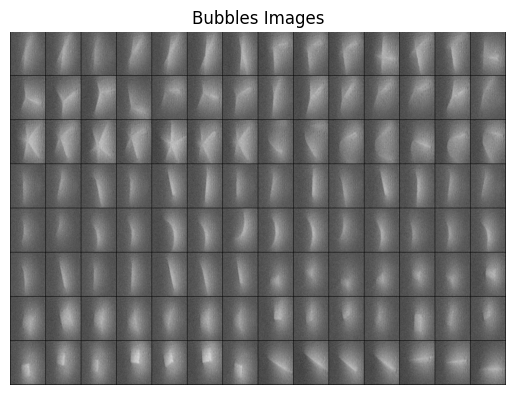

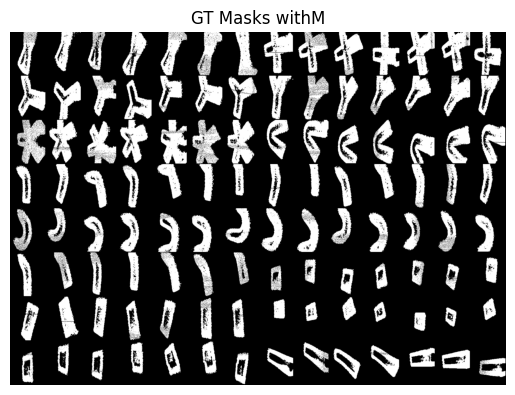

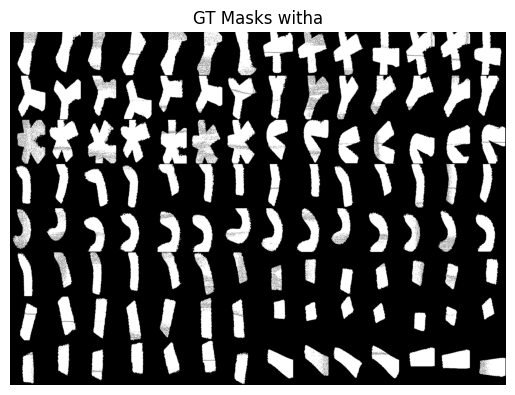

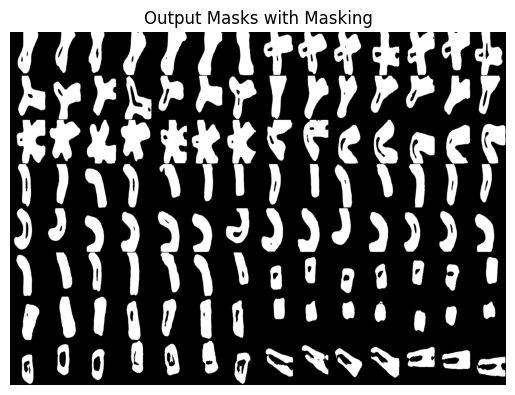

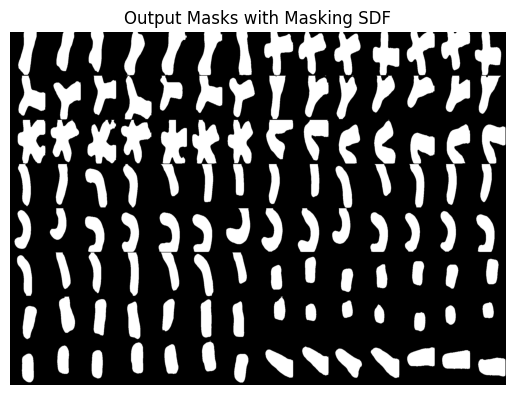

Test Set on Test Tools


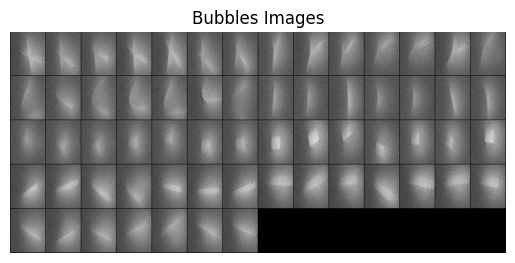

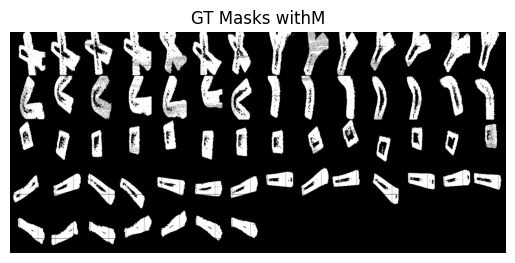

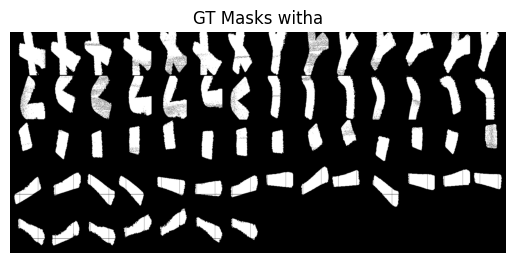

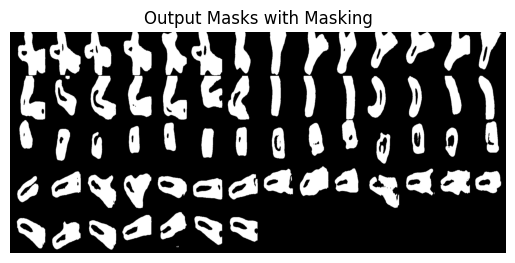

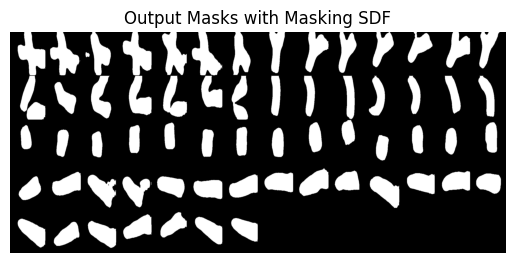

In [7]:
datasets = ['test', 'test_unseen']
for set in datasets:
    if set == 'test':
        print('Test Set on Train Tools')
    else:
        print('Test Set on Test Tools')

    image_path = os.path.join(models[0], set, 'images.png')
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title('Bubbles Images')
    plt.axis('off')
    plt.show()
    image_path = os.path.join(models[0], set, 'true_masks.png')
    image = Image.open(image_path)
    plt.figure()
    plt.imshow(image)
    plt.title('GT Masks with' + model_name[0])
    plt.axis('off')
    plt.show()
    image_path = os.path.join(models[1], set, 'true_masks.png')
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title('GT Masks with'  + model_name[1])
    plt.axis('off')
    plt.show()
    for i in range(len(models)):
        model = models[i]
        model_name = models_name[i]
        image_path = os.path.join(model, set, 'out_masks.png')
        image = Image.open(image_path)
        plt.figure()
        plt.imshow(image)
        plt.title('Output Masks with ' + model_name)
        plt.axis('off')
        plt.show()
    

### Quantitative Results

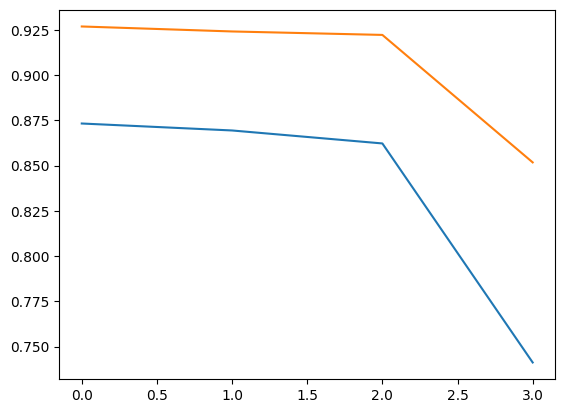

In [8]:
import tabulate
table = []
for i in range(len(models)):
    scores_path = os.path.join(models[i], 'scores.csv')
    scores = open(scores_path, 'r').readlines()
    scores = scores[1:]
    scores = [s.split(',') for s in scores]
    scores = [float(s[1]) for s in scores]
    table.append([models_name[i], scores])

print(tabulate(table, headers=['Model', 'Scores'], tablefmt='grid'))